In [3]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [6]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})
df

,beta,exponential,normal_p,normal_l
0,56.392078,16.370315,8.974306,7.367475
1,55.433079,0.983525,8.752982,6.011074
2,59.107205,17.361173,11.845799,-4.365198
3,53.829963,1.972996,13.787722,22.557831
4,54.609036,4.935617,12.499712,15.480976
...,...,...,...,...
995,58.764954,0.619743,9.453300,8.691399
996,50.586289,6.564606,11.436066,4.074672
997,59.148066,7.982871,9.561153,17.146902
998,57.766313,20.999405,9.933464,-4.881129


In [7]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal
df

,beta,exponential,normal_p,normal_l,bimodal
0,56.392078,16.370315,8.974306,7.367475,20.343988
1,55.433079,0.983525,8.752982,6.011074,16.025391
2,59.107205,17.361173,11.845799,-4.365198,24.959789
3,53.829963,1.972996,13.787722,22.557831,21.254082
4,54.609036,4.935617,12.499712,15.480976,20.905316
...,...,...,...,...,...
995,58.764954,0.619743,9.453300,8.691399,-14.700054
996,50.586289,6.564606,11.436066,4.074672,-19.524366
997,59.148066,7.982871,9.561153,17.146902,-19.240356
998,57.766313,20.999405,9.933464,-4.881129,-19.701636


<AxesSubplot: ylabel='Density'>

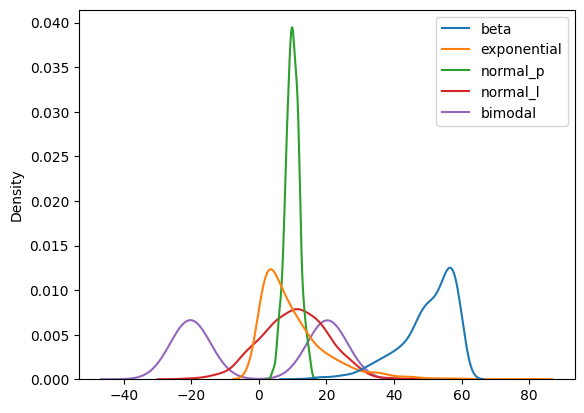

In [8]:
sns.kdeplot(data=df)

In [9]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.995342,10.335837,9.921313,10.597246,-0.000038
std,8.444229,10.023835,2.016190,9.794655,20.480531
min,12.639911,0.003528,4.032463,-22.566671,-31.183219
25%,46.011013,3.009933,8.607192,4.207900,-20.223366
50%,51.842707,7.450043,9.904088,10.906632,0.040598
75%,56.506828,14.219682,11.277705,17.353879,20.352072
max,59.992145,79.261231,15.540185,44.845951,29.319723


<AxesSubplot: ylabel='Density'>

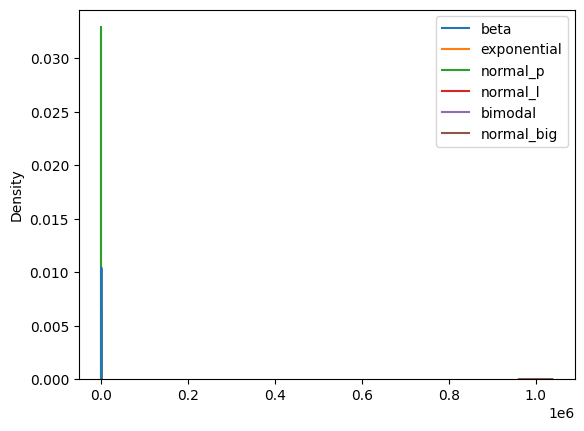

In [10]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot: >

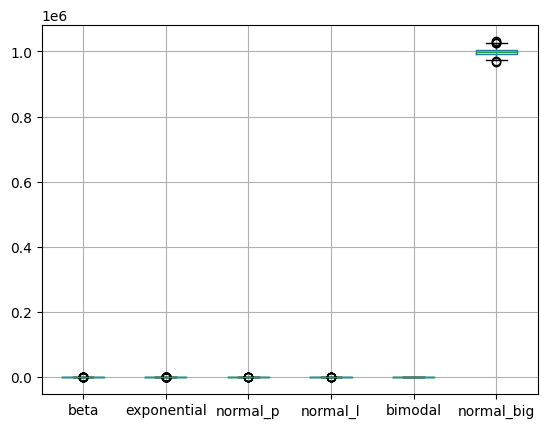

In [11]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [14]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.757907,0.602314,-0.469936,-0.329913,0.993832,-0.149221
1,0.644281,-0.933474,-0.579764,-0.468466,0.782863,-0.927271
2,1.079604,0.701214,0.954994,-1.528377,1.219320,-0.936667
3,0.454339,-0.834713,1.918640,1.221745,1.038291,2.015060
4,0.546646,-0.539007,1.279487,0.498861,1.021254,0.108721


<AxesSubplot: ylabel='Density'>

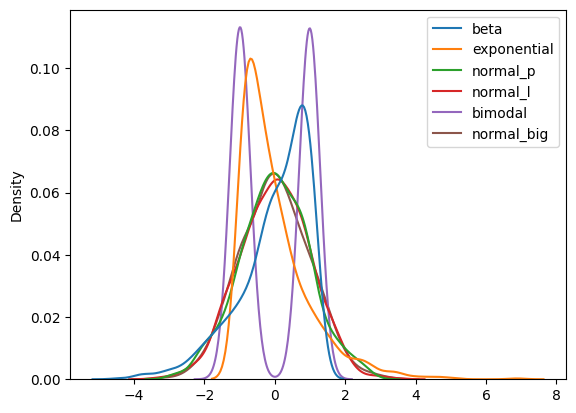

In [15]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [16]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-6.750156e-16,1.794120e-16,-4.751755e-16,1.740830e-16,-1.136868e-16,-1.014477e-14
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.425996e+00,-1.031290e+00,-2.922242e+00,-3.387614e+00,-1.523339e+00,-3.297225e+00
25%,-4.720765e-01,-7.312141e-01,-6.521101e-01,-6.526563e-01,-9.879356e-01,-7.163703e-01
50%,2.188820e-01,-2.880372e-01,-8.547288e-03,3.160305e-02,1.985132e-03,-6.128778e-03
75%,7.715027e-01,3.876549e-01,6.730868e-01,6.901738e-01,9.942269e-01,6.682047e-01
max,1.184455e+00,6.879591e+00,2.788271e+00,3.498422e+00,1.432308e+00,3.328142e+00


<AxesSubplot: >

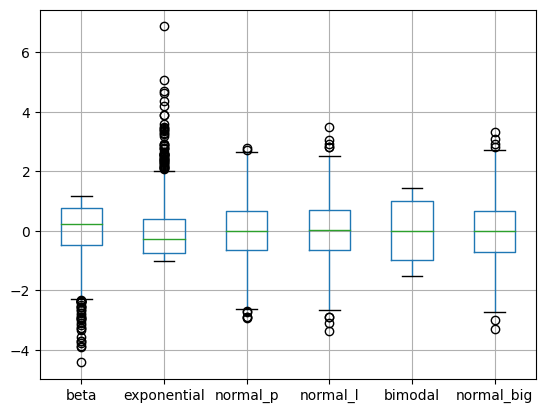

In [17]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()